In [ ]:
#Võ Đình Nghi 19146097
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
train_path = '/content/drive/MyDrive/AI (1)/10 loai mon an'
valid_path = '/content/drive/MyDrive/AI (1)/10 loai mon an'
test_path = '/content/drive/MyDrive/AI (1)/10 loai mon an'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory(train_path, target_size=(224, 224), 
                                                  batch_size=10, class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(valid_path, target_size=(224, 224),
                                                      batch_size=10, class_mode='categorical')

test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 180 images belonging to 10 classes.
Found 180 images belonging to 10 classes.
Found 180 images belonging to 10 classes.


# Mục mới

In [ ]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Flatten(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=validation_batches,
          validation_steps=len(validation_batches), epochs=200, verbose=1)

Epoch 1/200
18/18 [==============================] - 53s 2s/step - loss: 2.4259 - accuracy: 0.0778 - val_loss: 2.2733 - val_accuracy: 0.1611
Epoch 2/200
18/18 [==============================] - 4s 200ms/step - loss: 2.1331 - accuracy: 0.1611 - val_loss: 1.9748 - val_accuracy: 0.2944
Epoch 3/200
18/18 [==============================] - 3s 175ms/step - loss: 2.0073 - accuracy: 0.2333 - val_loss: 1.8477 - val_accuracy: 0.3500
Epoch 4/200
18/18 [==============================] - 3s 180ms/step - loss: 1.9184 - accuracy: 0.2333 - val_loss: 1.7752 - val_accuracy: 0.3333
Epoch 5/200
18/18 [==============================] - 3s 172ms/step - loss: 1.7583 - accuracy: 0.2889 - val_loss: 1.4367 - val_accuracy: 0.4556
Epoch 6/200
18/18 [==============================] - 3s 179ms/step - loss: 1.6009 - accuracy: 0.3611 - val_loss: 1.4450 - val_accuracy: 0.4056
Epoch 7/200
18/18 [==============================] - 3s 173ms/step - loss: 1.8369 - accuracy: 0.2667 - val_loss: 1.5666 - val_accuracy: 0.4889
E

In [ ]:
model.save('10monan.h5')

In [ ]:
classes = ['banh chung','banh cuon','banh da','banh mi','banh xeo','cha gio','cha lua','com tam','pho','xoi gac']
print("Image Processing.......Completed")

Image Processing.......Completed


Saving troi-mua-thu-lam-banh-xeo-kieu-mien-bac-gion-ngon-it-dau-mo-202005201034115966.jpg to troi-mua-thu-lam-banh-xeo-kieu-mien-bac-gion-ngon-it-dau-mo-202005201034115966.jpg
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  banh xeo


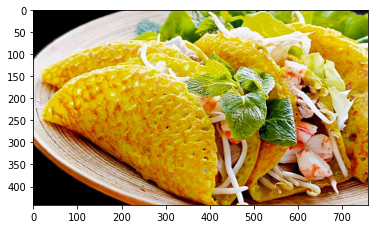

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=200000)
  print(y_predict)
  print('Giá trị dự đoán: ', classes[np.argmax(y_predict)])